In [14]:
import numpy as np
import pandas as pd

In [15]:
df=pd.read_csv("C:\\Users\\ANJU SUSAN\\Downloads\\Groceries_data1.csv")

In [16]:
df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,21-07-2015,tropical fruit,2015,7,21,1
1,2552,01-05-2015,whole milk,2015,5,1,4
2,2300,19-09-2015,pip fruit,2015,9,19,5
3,1187,12-12-2015,other vegetables,2015,12,12,5
4,3037,02-01-2015,whole milk,2015,1,2,4


In [17]:
df

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,21-07-2015,tropical fruit,2015,7,21,1
1,2552,01-05-2015,whole milk,2015,5,1,4
2,2300,19-09-2015,pip fruit,2015,9,19,5
3,1187,12-12-2015,other vegetables,2015,12,12,5
4,3037,02-01-2015,whole milk,2015,1,2,4
...,...,...,...,...,...,...,...
38760,4471,10-08-2014,sliced cheese,2014,8,10,6
38761,2022,23-02-2014,candy,2014,2,23,6
38762,1097,16-04-2014,cake bar,2014,4,16,2
38763,1510,12-03-2014,fruit/vegetable juice,2014,3,12,2


In [18]:
df['date']=pd.to_datetime(df[['year','month','day']])
df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week,date
0,1808,21-07-2015,tropical fruit,2015,7,21,1,2015-07-21
1,2552,01-05-2015,whole milk,2015,5,1,4,2015-05-01
2,2300,19-09-2015,pip fruit,2015,9,19,5,2015-09-19
3,1187,12-12-2015,other vegetables,2015,12,12,5,2015-12-12
4,3037,02-01-2015,whole milk,2015,1,2,4,2015-01-02


In [19]:
df['member_date']=list(zip(df['Member_number'],df['date'].dt.date))
df['quantity']=1

In [20]:
df.shape

(38765, 10)

In [21]:
df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week,date,member_date,quantity
0,1808,21-07-2015,tropical fruit,2015,7,21,1,2015-07-21,"(1808, 2015-07-21)",1
1,2552,01-05-2015,whole milk,2015,5,1,4,2015-05-01,"(2552, 2015-05-01)",1
2,2300,19-09-2015,pip fruit,2015,9,19,5,2015-09-19,"(2300, 2015-09-19)",1
3,1187,12-12-2015,other vegetables,2015,12,12,5,2015-12-12,"(1187, 2015-12-12)",1
4,3037,02-01-2015,whole milk,2015,1,2,4,2015-01-02,"(3037, 2015-01-02)",1


In [22]:
df.groupby('itemDescription').size().sort_values(ascending=False)

itemDescription
whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
preservation products       1
kitchen utensil             1
Length: 167, dtype: int64

In [23]:
basket=df.groupby(['member_date','itemDescription'])['quantity'].count().unstack().fillna(0)

In [24]:
def convert_values(value):
    if value>=1:
        return 1
    else:
        return 0

In [25]:
basket=basket.applymap(convert_values)

In [26]:
from mlxtend.frequent_patterns import fpgrowth

In [27]:
from mlxtend.frequent_patterns import association_rules

In [28]:
res=fpgrowth(basket,min_support=0.005,use_colnames=True,max_len=2)

In [29]:
rules=association_rules(res,metric="lift")

In [30]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638
1,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861
2,(yogurt),(rolls/buns),0.085879,0.110005,0.007819,0.091051,0.827697,-0.001628,0.979147
3,(rolls/buns),(yogurt),0.110005,0.085879,0.007819,0.071081,0.827697,-0.001628,0.984071
4,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811
5,(whole milk),(sausage),0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140
6,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,0.000565,1.010345
7,(yogurt),(sausage),0.085879,0.060349,0.005748,0.066926,1.108986,0.000565,1.007049
8,(sausage),(rolls/buns),0.060349,0.110005,0.005347,0.088594,0.805362,-0.001292,0.976508
9,(rolls/buns),(sausage),0.110005,0.060349,0.005347,0.048603,0.805362,-0.001292,0.987654


In [31]:
rules.sort_values("confidence", ascending=False).head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
35,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874
4,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811
39,(newspapers),(whole milk),0.038896,0.157923,0.005614,0.144330,0.913926,-0.000529,0.984114
37,(domestic eggs),(whole milk),0.037091,0.157923,0.005280,0.142342,0.901341,-0.000578,0.981834
21,(frankfurter),(whole milk),0.037760,0.157923,0.005280,0.139823,0.885388,-0.000683,0.978958
23,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420
43,(pork),(whole milk),0.037091,0.157923,0.005012,0.135135,0.855703,-0.000845,0.973652
31,(pip fruit),(whole milk),0.049054,0.157923,0.006616,0.134877,0.854071,-0.001130,0.973362
41,(citrus fruit),(whole milk),0.053131,0.157923,0.007151,0.134591,0.852259,-0.001240,0.973040
33,(shopping bags),(whole milk),0.047584,0.157923,0.006349,0.133427,0.844887,-0.001166,0.971732


In [32]:
df.isnull().any()

Member_number      False
Date               False
itemDescription    False
year               False
month              False
day                False
day_of_week        False
date               False
member_date        False
quantity           False
dtype: bool

In [33]:
df.itemDescription.unique()

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [34]:
df["month"] = df["month"].astype(int)
df.loc[(df['month']==12),'season'] = "winter"
df.loc[(df['month']>=1) &  (df['month']<=3),'season'] = "winter"
df.loc[(df['month']>3) &  (df['month']<=6),'season'] = "spring"
df.loc[(df['month']>6) &  (df['month']<=9),'season'] = "summer"
df.loc[(df['month']>9) &  (df['month']<=11),'season'] = "fall"

df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week,date,member_date,quantity,season
0,1808,21-07-2015,tropical fruit,2015,7,21,1,2015-07-21,"(1808, 2015-07-21)",1,summer
1,2552,01-05-2015,whole milk,2015,5,1,4,2015-05-01,"(2552, 2015-05-01)",1,spring
2,2300,19-09-2015,pip fruit,2015,9,19,5,2015-09-19,"(2300, 2015-09-19)",1,summer
3,1187,12-12-2015,other vegetables,2015,12,12,5,2015-12-12,"(1187, 2015-12-12)",1,winter
4,3037,02-01-2015,whole milk,2015,1,2,4,2015-01-02,"(3037, 2015-01-02)",1,winter


In [35]:
!pip install sns

In [36]:
import sns

In [37]:
import seaborn as sns

C:\Users\ANJU SUSAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'plt' is not defined

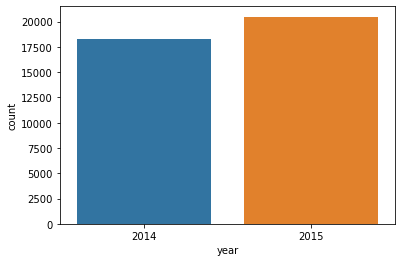

In [38]:
sns.countplot(df["year"].astype(int))
plt.show()

C:\Users\ANJU SUSAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'plt' is not defined

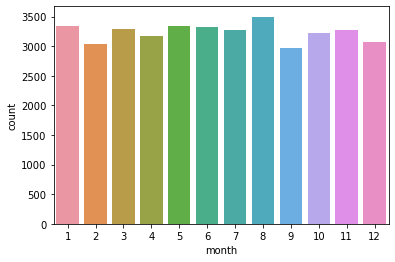

In [39]:
sns.countplot(df["month"].astype(int))
plt.show()

C:\Users\ANJU SUSAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'plt' is not defined

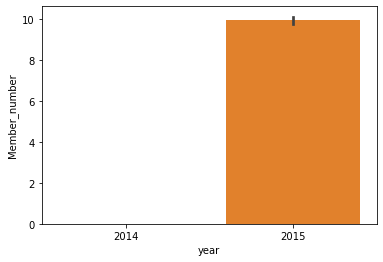

In [40]:
sns.barplot(df["year"].astype(int), df["Member_number"].value_counts())
plt.show()

C:\Users\ANJU SUSAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'plt' is not defined

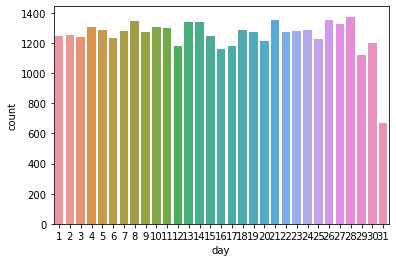

In [41]:
sns.countplot(df["day"].astype(int))
plt.show()

C:\Users\ANJU SUSAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'plt' is not defined

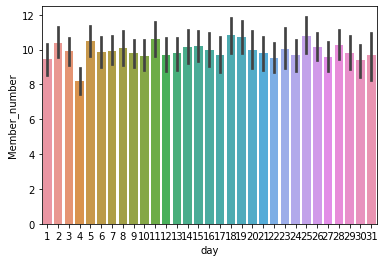

In [42]:
sns.barplot(df["day"].astype(int), df["Member_number"].value_counts())
plt.show()

C:\Users\ANJU SUSAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'plt' is not defined

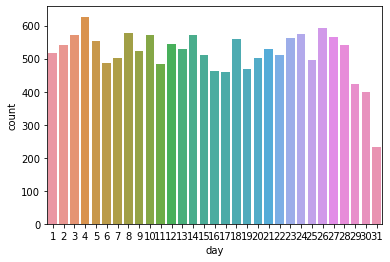

In [43]:
df_month = df[(df['month']>=1) & (df['month']<=3) | (df['month']>=11) & (df['month']<=12)]
sns.countplot(df_month["day"].astype(int))
plt.show()

NameError: name 'plt' is not defined

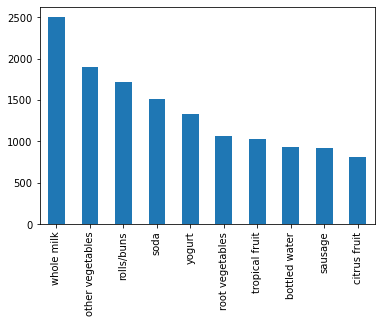

In [44]:
df["itemDescription"].value_counts()[:10].plot(kind="bar")
plt.show()

NameError: name 'plt' is not defined

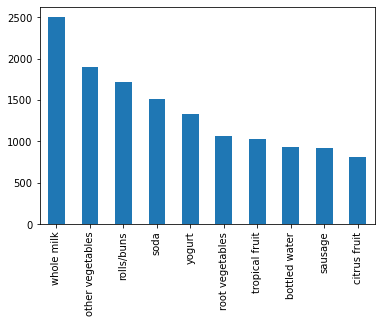

In [45]:
df["itemDescription"].value_counts()[:10].plot(kind="bar")
plt.show()

In [46]:
df

,Member_number,Date,itemDescription,year,month,day,day_of_week,date,member_date,quantity,season
0,1808,21-07-2015,tropical fruit,2015,7,21,1,2015-07-21,"(1808, 2015-07-21)",1,summer
1,2552,01-05-2015,whole milk,2015,5,1,4,2015-05-01,"(2552, 2015-05-01)",1,spring
2,2300,19-09-2015,pip fruit,2015,9,19,5,2015-09-19,"(2300, 2015-09-19)",1,summer
3,1187,12-12-2015,other vegetables,2015,12,12,5,2015-12-12,"(1187, 2015-12-12)",1,winter
4,3037,02-01-2015,whole milk,2015,1,2,4,2015-01-02,"(3037, 2015-01-02)",1,winter
...,...,...,...,...,...,...,...,...,...,...,...
38760,4471,10-08-2014,sliced cheese,2014,8,10,6,2014-08-10,"(4471, 2014-08-10)",1,summer
38761,2022,23-02-2014,candy,2014,2,23,6,2014-02-23,"(2022, 2014-02-23)",1,winter
38762,1097,16-04-2014,cake bar,2014,4,16,2,2014-04-16,"(1097, 2014-04-16)",1,spring
38763,1510,12-03-2014,fruit/vegetable juice,2014,3,12,2,2014-03-12,"(1510, 2014-03-12)",1,winter


In [47]:
corrMatrix=df.corr()
print(corrMatrix)

               Member_number      year     month       day  day_of_week  \
Member_number       1.000000 -0.003019  0.001333  0.000940    -0.006489   
year               -0.003019  1.000000 -0.000248  0.004209     0.000415   
month               0.001333 -0.000248  1.000000  0.006896    -0.012917   
day                 0.000940  0.004209  0.006896  1.000000    -0.004957   
day_of_week        -0.006489  0.000415 -0.012917 -0.004957     1.000000   
quantity                 NaN       NaN       NaN       NaN          NaN   

               quantity  
Member_number       NaN  
year                NaN  
month               NaN  
day                 NaN  
day_of_week         NaN  
quantity            NaN  


In [48]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

NameError: name 'sn' is not defined

In [49]:
import seaborn as sn

NameError: name 'plt' is not defined

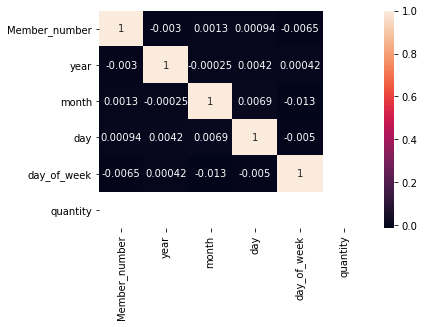

In [50]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [51]:
sns.FacetGrid(df,hue="Status",size=5).map(sns.distplot,"itemDescription").add_legend()

C:\Users\ANJU SUSAN\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


KeyError: 'Status'

In [52]:
sns.FacetGrid(df,hue="Surv_status",height=5).map(sns.distplot,"itemDescription").add_legend()

KeyError: 'Surv_status'

C:\Users\ANJU SUSAN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: 'rolls/buns'

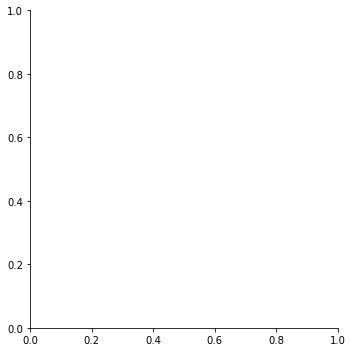

In [53]:
sns.FacetGrid(df,hue="year",height=5).map(sns.distplot,"itemDescription").add_legend()

In [54]:
basket

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
member_date,,,,,,,,,,,,,,,,,,,,,
"(1000, 2014-06-24)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
"(1000, 2015-03-15)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
"(1000, 2015-05-27)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(1000, 2015-07-24)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(1000, 2015-11-25)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(4999, 2015-05-16)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
"(4999, 2015-12-26)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(5000, 2014-09-03)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
res

,support,itemsets
0,0.157923,(whole milk)
1,0.051728,(pastry)
2,0.018780,(salty snack)
3,0.085879,(yogurt)
4,0.060349,(sausage)
...,...,...
121,0.007151,"(whole milk, bottled beer)"
122,0.005280,"(whole milk, domestic eggs)"
123,0.005614,"(whole milk, newspapers)"
124,0.007151,"(whole milk, citrus fruit)"


In [56]:
df['Member_number'].fillna(0,inplace=True)

In [57]:
df['itemDescription'].fillna(dataset[itemDescription].mean(),inplace=True)

NameError: name 'dataset' is not defined

In [58]:
df['itemDescription'].fillna(df[itemDescription].mean(),inplace=True)

NameError: name 'itemDescription' is not defined

In [60]:
df

,Member_number,Date,itemDescription,year,month,day,day_of_week,date,member_date,quantity,season
0,1808,21-07-2015,tropical fruit,2015,7,21,1,2015-07-21,"(1808, 2015-07-21)",1,summer
1,2552,01-05-2015,whole milk,2015,5,1,4,2015-05-01,"(2552, 2015-05-01)",1,spring
2,2300,19-09-2015,pip fruit,2015,9,19,5,2015-09-19,"(2300, 2015-09-19)",1,summer
3,1187,12-12-2015,other vegetables,2015,12,12,5,2015-12-12,"(1187, 2015-12-12)",1,winter
4,3037,02-01-2015,whole milk,2015,1,2,4,2015-01-02,"(3037, 2015-01-02)",1,winter
...,...,...,...,...,...,...,...,...,...,...,...
38760,4471,10-08-2014,sliced cheese,2014,8,10,6,2014-08-10,"(4471, 2014-08-10)",1,summer
38761,2022,23-02-2014,candy,2014,2,23,6,2014-02-23,"(2022, 2014-02-23)",1,winter
38762,1097,16-04-2014,cake bar,2014,4,16,2,2014-04-16,"(1097, 2014-04-16)",1,spring
38763,1510,12-03-2014,fruit/vegetable juice,2014,3,12,2,2014-03-12,"(1510, 2014-03-12)",1,winter


In [61]:
df.itemDescription.unique.sort_values()

AttributeError: 'function' object has no attribute 'sort_values'

In [62]:
df.itemDescription.unique.sort_values(ascending=True)

AttributeError: 'function' object has no attribute 'sort_values'

In [63]:
df.itemDescription.unique().sort_values(ascending=True)

AttributeError: 'numpy.ndarray' object has no attribute 'sort_values'

In [66]:
df2=df.itemDescription.unique().sort()
print(df2)

None


In [65]:
df.head(3)

,Member_number,Date,itemDescription,year,month,day,day_of_week,date,member_date,quantity,season
0,1808,21-07-2015,tropical fruit,2015,7,21,1,2015-07-21,"(1808, 2015-07-21)",1,summer
1,2552,01-05-2015,whole milk,2015,5,1,4,2015-05-01,"(2552, 2015-05-01)",1,spring
2,2300,19-09-2015,pip fruit,2015,9,19,5,2015-09-19,"(2300, 2015-09-19)",1,summer
